# Seoul Bike Sharing Demand Model

This model seeks to identify a linear relation between a set of predictor variables, ranging from weather conditions to time of day, and the Rented Bike Count. So that the Bike Share company can better idenfy the demand for their services at specific times of day and year.

## Steps 

- Step 1 - Reading, understanding and visualising data
- Step 2 - Preparing Data for modeling
- Step 3 - Training Model
- Step 4 - Residual analysis
- Step 5 - Predictions and Evaluation of test set

### Step 1 - Reading, Understanding and Visualising Data

In [1]:
#importing intitial EDA libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read csv file

bike_share = pd.read_csv('SeoulBikeData.csv', encoding = 'unicode_escape', parse_dates=['Date'])
bike_share.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
#shape of dataset

bike_share.shape

(8760, 14)

8760 entries with 14 attributes

In [4]:
#dataset info

bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

There are no null values in the dataset, makes preprocessing more straightforward. 
- datatypes appear to be okay
- need to check the values within the categorical fields of Seasons, Holiday, Functioning Day
- a is_weekday field can be created. This is not a time series analysis so the date is not explicitly needed

In [5]:
bike_share['is_weekday'] = bike_share['Date'].apply(lambda x: 1 if x.weekday() < 5 else 0)
bike_share.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,is_weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1


In [6]:
#descriptive stats

bike_share.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),is_weekday
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,0.709589
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.453978
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,1.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000


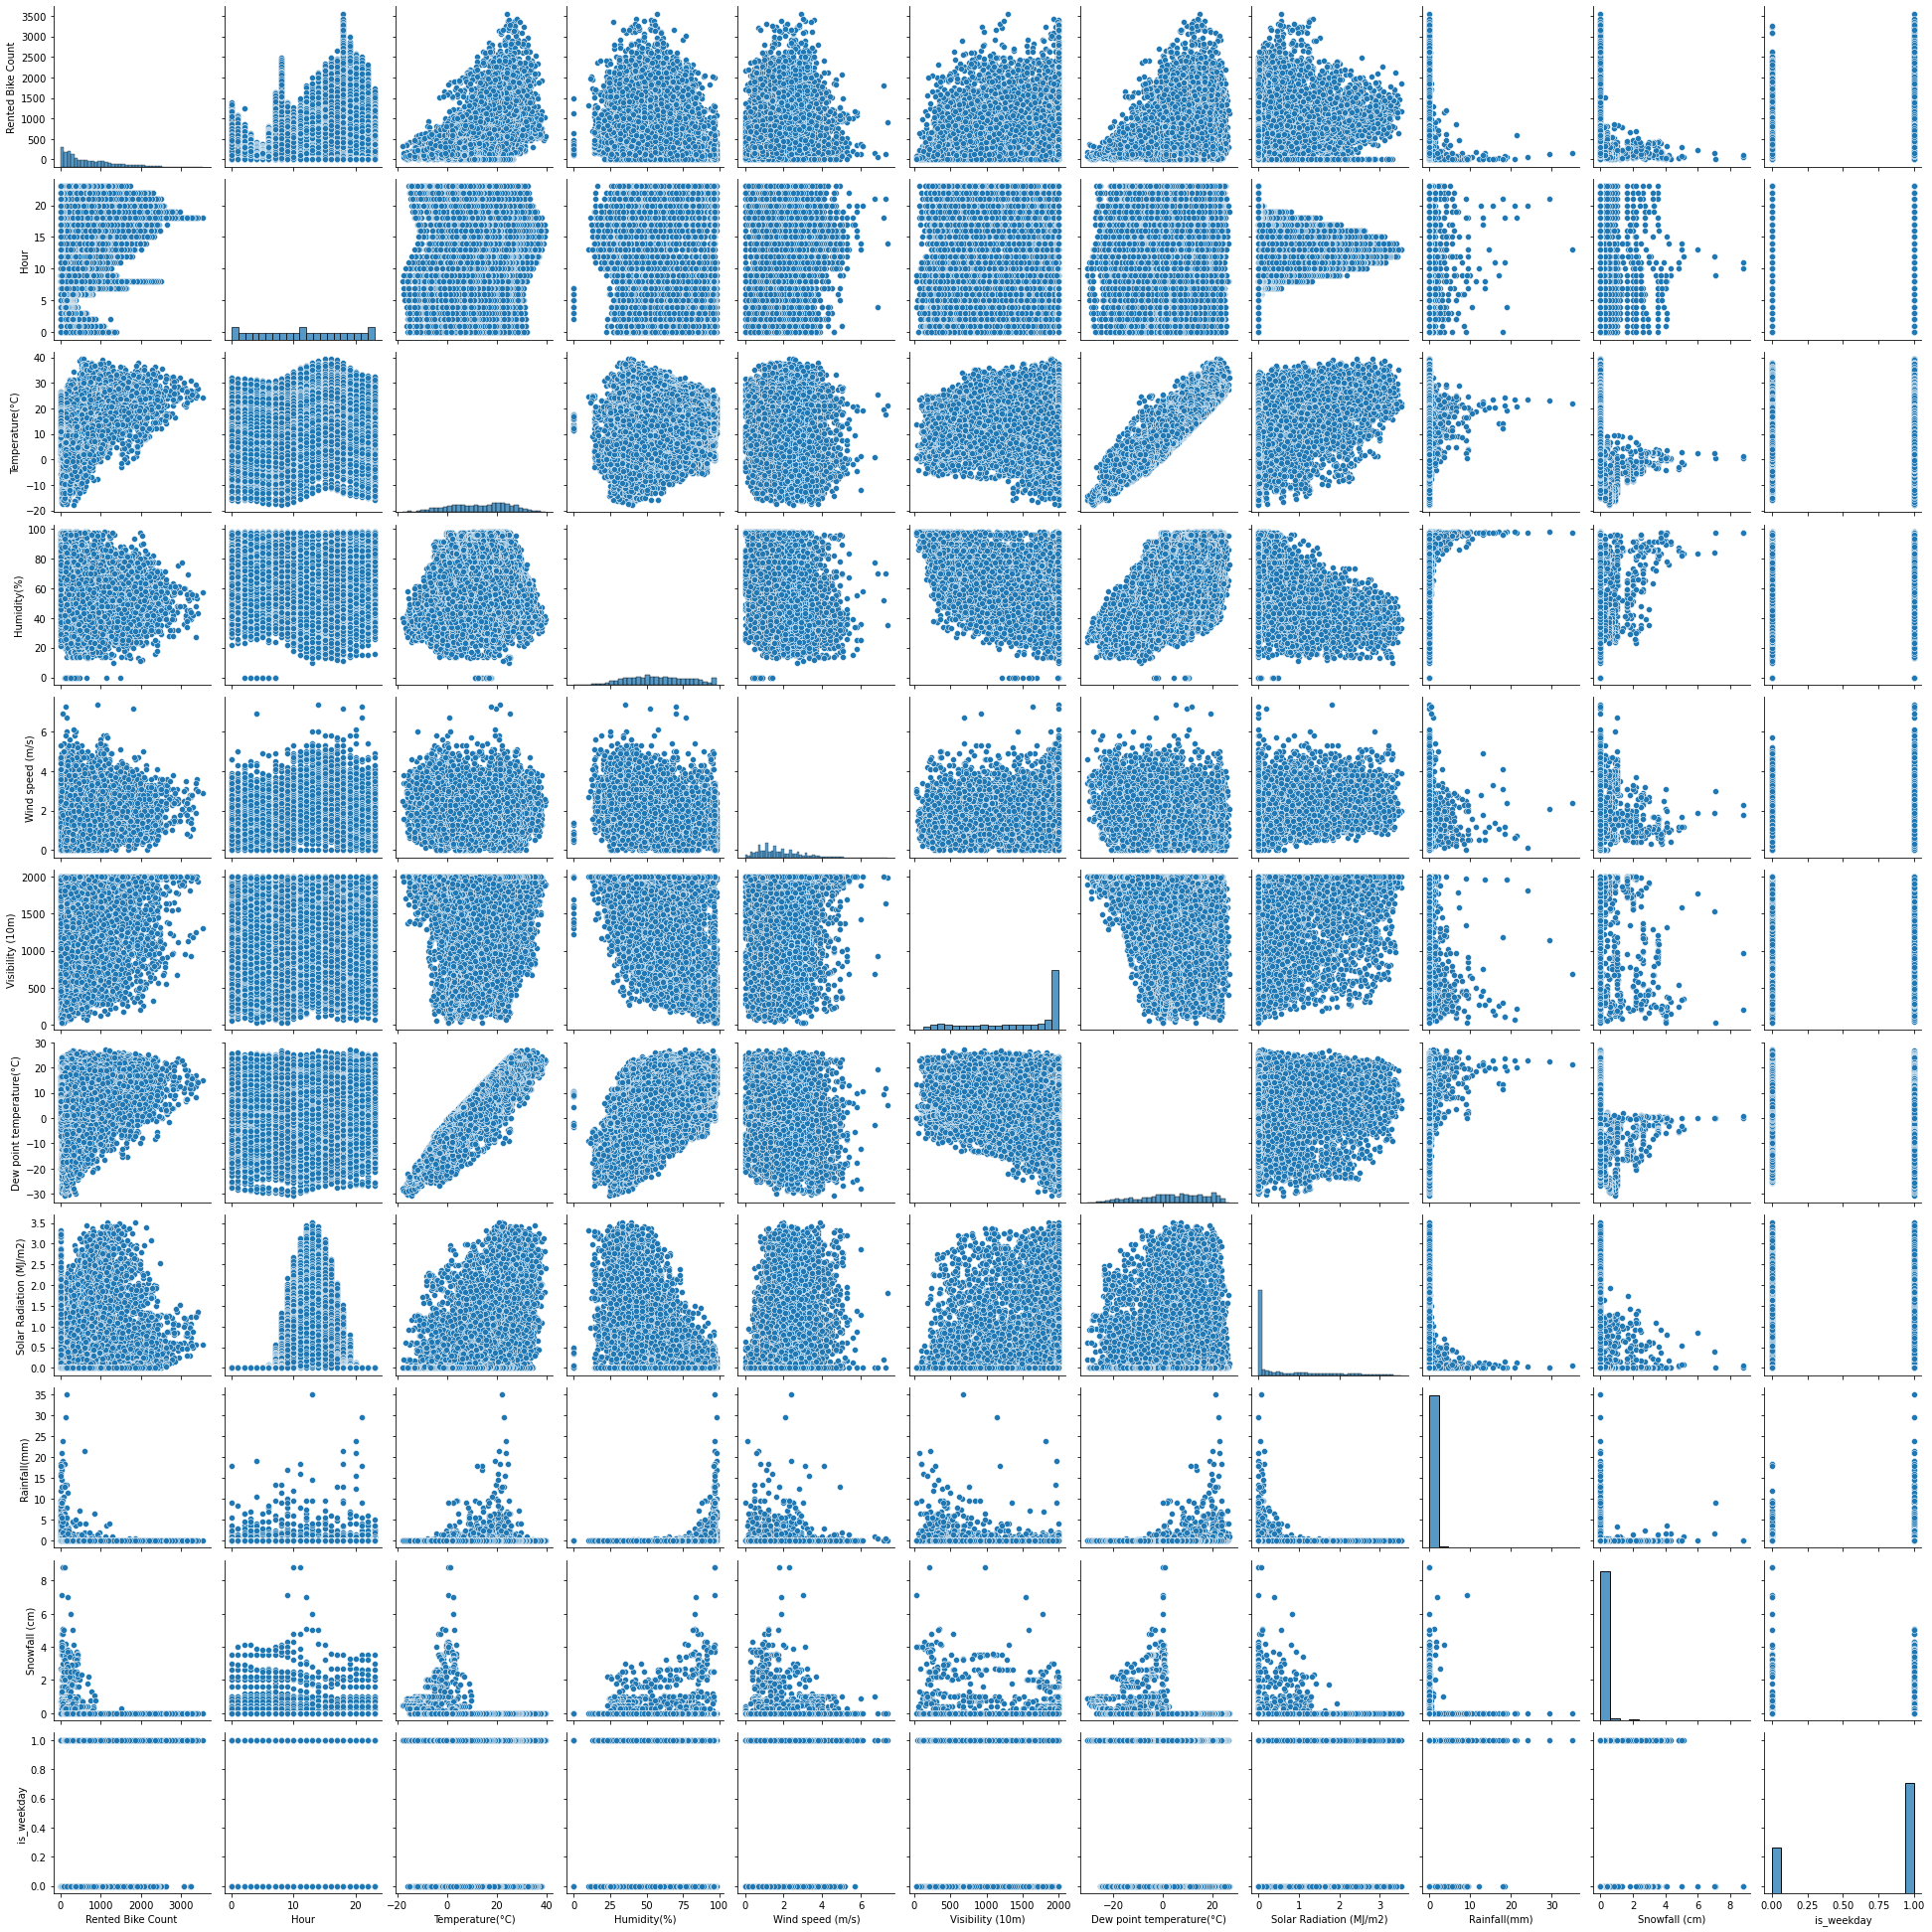

In [7]:
#visualise the numeric variables above

sns.pairplot(bike_share)
plt.show()

temperature and rented bike count have the most clear linear relationship. temperature and dew popint temperature seem to be collinear but this is expected since both dew point is tied to the temperature. In checking VIF later will determine the next steps for that variable 

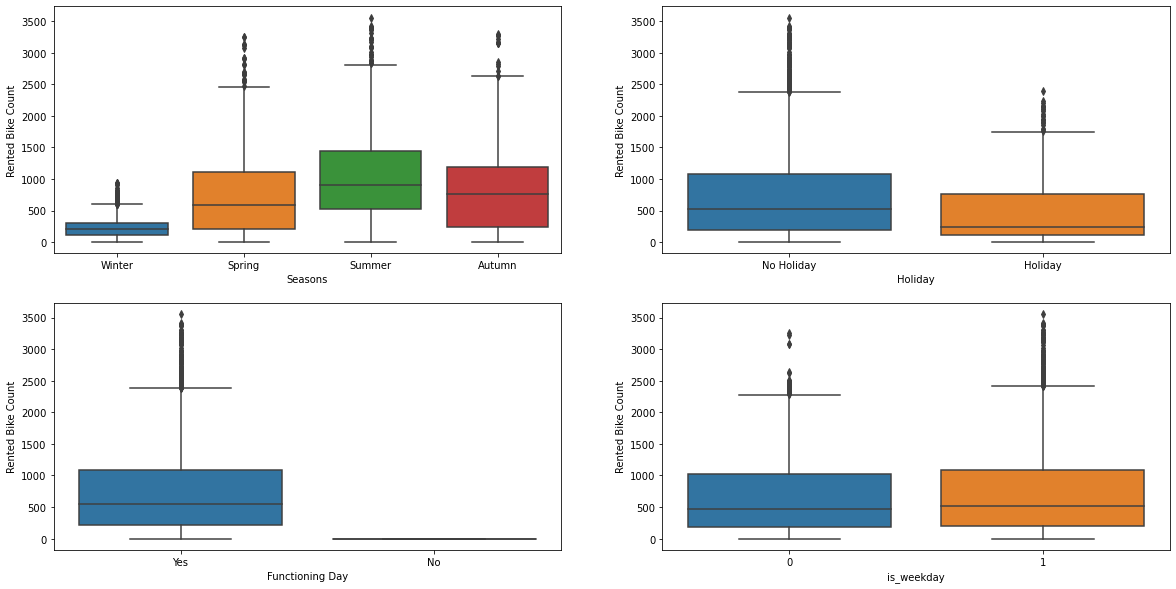

In [8]:
#visualising the categorical variables

plt.figure(figsize=(20,10))

plt.subplot(2,2,1) #row 2 col 2, pos 1
sns.boxplot(x='Seasons', y='Rented Bike Count', data=bike_share)

plt.subplot(2,2,2) #pos 2
sns.boxplot(x='Holiday', y='Rented Bike Count', data=bike_share)


plt.subplot(2,2,3)
sns.boxplot(x='Functioning Day', y='Rented Bike Count', data=bike_share)

plt.subplot(2,2,4)
sns.boxplot(x='is_weekday', y='Rented Bike Count', data=bike_share)

plt.show()

- Seasons show seasonality with summer having the most usage while winter has the least
- days with no holiday have higher usage
- functioning day of yes seems to be the norm. if there aren't enough "no" values in column, it will be dropped. Will do a check in preprocessing.
- median values for is_weekday true and false are similar but the spread for weekday is a bit larger

There seems to be some interaction between the categorical variables and the response

### Step 2 - Preparing Data for Modelling

In [9]:
#constant features check - categorical or numeric fields with a single value

def find_constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features

constant_features = find_constant_features(bike_share)
constant_features

[]

In [10]:
## checking functioning day

bike_share['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

From the boxplot and value counts, it appears there are no rentals on days when the company did not function. Since this does not explicitly impact user demand, I will drop the field. There is no need to rebalance this field since it is not used in analysis.

In [11]:
#dropping features not needed

bike_share.drop(['Date','Functioning Day'], axis=1, inplace=True)
bike_share.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'is_weekday'],
      dtype='object')

In [12]:
#creating dummy variables for season

seasons = pd.get_dummies(bike_share['Seasons'], drop_first=True)
seasons.head()

,Spring,Summer,Winter
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [13]:
bike_share = pd.concat([bike_share, seasons], axis=1)
bike_share.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,is_weekday,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1,0,0,1


In [14]:
bike_share.drop(['Seasons'], axis=1, inplace=True)
bike_share.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'is_weekday', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [15]:
#encoding Holiday as binary 1/0 with no holiday == 0

bike_share['Holiday'] = bike_share['Holiday'].apply(lambda x: 1 if x=='Holiday' else 0)
bike_share.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,is_weekday,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,1


Data is can now be split into test and training then it will be normalised
NB normalisation does not affect 0/1 fields but i will still specify the fields

In [16]:
#splitting data

from sklearn.model_selection import train_test_split

bike_train, bike_test = train_test_split(bike_share, train_size=0.8, random_state=100)

print(bike_train.shape)
print(bike_test.shape)

(7008, 15)
(1752, 15)


In [17]:
#rescaling the train set

from sklearn.preprocessing import MinMaxScaler

#create object instance
scaler = MinMaxScaler()

#Create List of numeric Variables to scale
num_vars = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


#fit to data

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,is_weekday,Spring,Summer,Winter
6465,0.021091,0.391304,0.687063,0.989796,0.121622,0.768373,0.891003,0.053977,0.014286,0.0,0,1,0,1,0
4278,0.180259,0.260870,0.594406,0.000000,0.067568,0.791181,0.690311,0.014205,0.000000,0.0,0,1,1,0,0
6427,0.574522,0.826087,0.762238,0.632653,0.445946,1.000000,0.839100,0.076705,0.000000,0.0,0,0,0,1,0
7575,0.371766,0.652174,0.610140,0.336735,0.283784,0.964014,0.539792,0.579545,0.000000,0.0,0,1,0,0,0
5033,0.018279,0.739130,0.699301,0.938776,0.162162,0.115053,0.889273,0.031250,0.140000,0.0,0,1,0,1,0


In [18]:
bike_train[num_vars].describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,0.197455,0.500875,0.536432,0.593054,0.233955,0.714669,0.599406,0.161828,0.004279,0.008453
std,0.180561,0.301426,0.209661,0.207460,0.139922,0.307253,0.226744,0.247261,0.033595,0.049316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.054274,0.260870,0.370629,0.428571,0.135135,0.463127,0.448097,0.000000,0.000000,0.000000
50%,0.142435,0.521739,0.551573,0.581633,0.202703,0.845413,0.615917,0.002841,0.000000,0.000000
75%,0.297877,0.782609,0.704545,0.755102,0.310811,1.000000,0.785467,0.267045,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


all variables are now on the same relative scale so the coeffients can be more easily compared in the model

### Step 3 - Train the Model

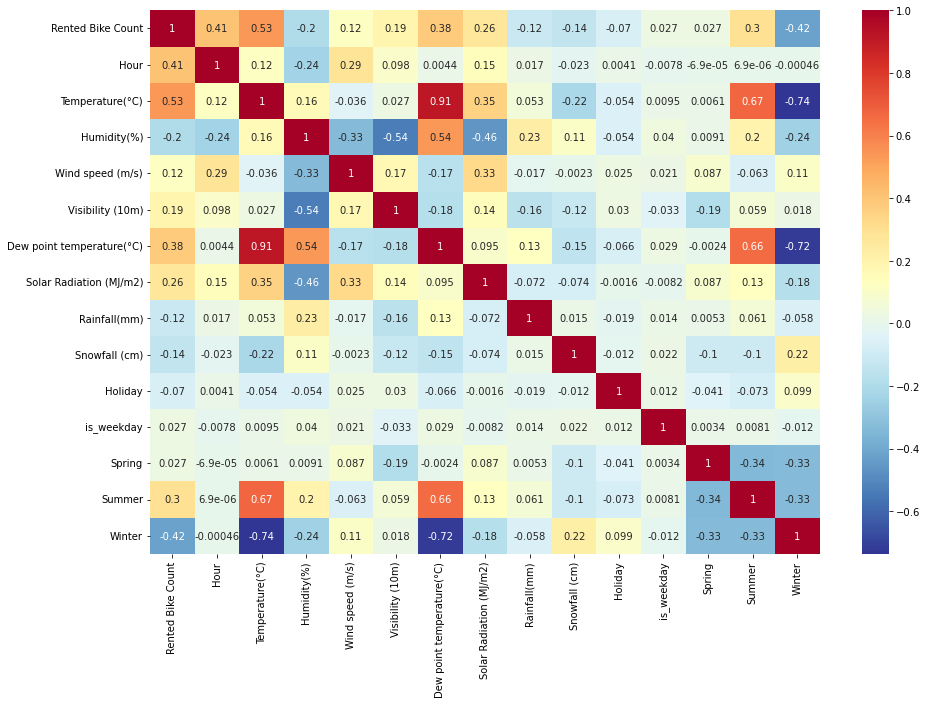

In [19]:
#plot heatmap to get an idea of correlations

plt.figure(figsize=(15,10))
sns.heatmap(bike_train.corr(), annot=True, cmap='RdYlBu_r')
plt.show()

quite a few variables seem highly correlated with one another but in terms of correlations with the response variable, all are between [-0.43, 0.54]

In [20]:
#importing libraries to perform regression

import statsmodels.api as sm


In [21]:
#dividing the training set to predictors and repsonse

y_train = bike_train.pop('Rented Bike Count')

bike_train_OG = bike_train.copy() #if i need to re-add a column in future


X_train = bike_train


In [22]:
#using all variables at first, will reduce based on analysis
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)

#create model
lr1 = sm.OLS(y_train, X_train_sm)

#fit model

lr_model1 = lr1.fit()


#model_summary
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     468.6
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:10:25   Log-Likelihood:                 4370.8
No. Observations:                7008   AIC:                            -8712.
Df Residuals:                    6993   BIC:                            -8609.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0917      0.018      4.959      0.000       0.055       0.128
Hour                          0.1802      0.006     31.878      0.000       0.169       0.191
Temperature(°C)               0.2200      0.072      3.073      0.002       0.080       0.360
Humidity(%)                  -0.3089      0.035     -8.925      0.000      -0.377      -0.241
Wind speed (m/s)              0.0306      0.013      2.423      0.015       0.006       0.055
Visibility (10m)              0.0003      0.007      0.046      0.963      -0.012       0.013
Dew point temperature(°C)     0.1755      0.076      2.313      0.021       0.027       0.324
Solar Radiation (MJ/m2)      -0.0741      0.009     -8.244      0.000      -0.092      -0.056
Rainfall(mm)                 -0.5479      0.048    -11.406      0.000      -0.642      -0.454
Snowfall (cm)                 0.1056      0.033      3.171      0.002       0.040       0.171
Holiday                      -0.0399      0.007     -5.405      0.000      -0.054      -0.025
is_weekday                    0.0130      0.003      3.802      0.000       0.006       0.020
Spring                       -0.0144      0.005     -3.136      0.002      -0.023      -0.005
Summer                       -0.0040      0.006     -0.711      0.477      -0.015       0.007
Winter                       -0.0859      0.007    -13.104      0.000      -0.099      -0.073
==============================================================================
Omnibus:                      751.994   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1499.117
Skew:                           0.693   Prob(JB):                         0.00
Kurtosis:                       4.792   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#create a dataframe to contain the VIF values

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
5,Dew point temperature(°C),628.30
1,Temperature(°C),383.90
2,Humidity(%),84.06
4,Visibility (10m),7.53
3,Wind speed (m/s),4.90
0,Hour,4.50
10,is_weekday,3.38
13,Winter,3.34
12,Summer,3.26
6,Solar Radiation (MJ/m2),2.93


Dew point has a very high VIF but low p-value. This meets the criteria for removal

In [24]:
X_train.drop('Dew point temperature(°C)', axis=1, inplace=True)

##### Model 2

In [25]:
#without dew point
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)

#create model
lr2 = sm.OLS(y_train, X_train_sm)

#fit model

lr_model2 = lr2.fit()


#model_summary
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     503.9
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:10:25   Log-Likelihood:                 4368.1
No. Observations:                7008   AIC:                            -8708.
Df Residuals:                    6994   BIC:                            -8612.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0660      0.015      4.464      0.000       0.037       0.095
Hour                        0.1799      0.006     31.822      0.000       0.169       0.191
Temperature(°C)             0.3812      0.017     22.999      0.000       0.349       0.414
Humidity(%)                -0.2339      0.012    -19.344      0.000      -0.258      -0.210
Wind speed (m/s)            0.0295      0.013      2.337      0.019       0.005       0.054
Visibility (10m)            0.0013      0.007      0.202      0.840      -0.011       0.014
Solar Radiation (MJ/m2)    -0.0785      0.009     -8.931      0.000      -0.096      -0.061
Rainfall(mm)               -0.5608      0.048    -11.749      0.000      -0.654      -0.467
Snowfall (cm)               0.0993      0.033      2.992      0.003       0.034       0.164
Holiday                    -0.0396      0.007     -5.359      0.000      -0.054      -0.025
is_weekday                  0.0135      0.003      3.943      0.000       0.007       0.020
Spring                     -0.0148      0.005     -3.220      0.001      -0.024      -0.006
Summer                     -0.0029      0.006     -0.518      0.605      -0.014       0.008
Winter                     -0.0861      0.007    -13.130      0.000      -0.099      -0.073
==============================================================================
Omnibus:                      759.482   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1507.843
Skew:                           0.700   Prob(JB):                         0.00
Kurtosis:                       4.790   Cond. No.                         55.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
1,Temperature(°C),28.57
2,Humidity(%),12.45
4,Visibility (10m),6.38
3,Wind speed (m/s),4.85
0,Hour,4.45
9,is_weekday,3.37
11,Summer,3.06
5,Solar Radiation (MJ/m2),2.73
12,Winter,2.68
10,Spring,2.04


The adj R-squred remained unchanged in new model. 
Temperature also has a very high VIF indicating other variables can explain it. Will remove and run again

In [27]:
X_train.drop('Temperature(°C)',axis=1, inplace=True)

##### Model 3

In [28]:
#without dew point, temp
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)

#create model
lr3 = sm.OLS(y_train, X_train_sm)

#fit model

lr_model3 = lr3.fit()


#model_summary
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     466.6
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:10:25   Log-Likelihood:                 4112.6
No. Observations:                7008   AIC:                            -8199.
Df Residuals:                    6995   BIC:                            -8110.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2344      0.013     17.603      0.000       0.208       0.261
Hour                        0.2108      0.006     37.018      0.000       0.200       0.222
Humidity(%)                -0.2003      0.012    -16.096      0.000      -0.225      -0.176
Wind speed (m/s)            0.0119      0.013      0.908      0.364      -0.014       0.037
Visibility (10m)            0.0014      0.007      0.211      0.833      -0.012       0.015
Solar Radiation (MJ/m2)    -0.0011      0.008     -0.125      0.900      -0.018       0.015
Rainfall(mm)               -0.5804      0.049    -11.729      0.000      -0.677      -0.483
Snowfall (cm)               0.0184      0.034      0.538      0.591      -0.049       0.085
Holiday                    -0.0275      0.008     -3.600      0.000      -0.042      -0.013
is_weekday                  0.0136      0.004      3.832      0.000       0.007       0.021
Spring                     -0.0247      0.005     -5.208      0.000      -0.034      -0.015
Summer                      0.0739      0.005     15.721      0.000       0.065       0.083
Winter                     -0.1864      0.005    -36.677      0.000      -0.196      -0.176
==============================================================================
Omnibus:                      836.850   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1431.629
Skew:                           0.814   Prob(JB):                    1.34e-311
Kurtosis:                       4.501   Cond. No.                         52.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
1,Humidity(%),5.61
3,Visibility (10m),4.98
2,Wind speed (m/s),4.85
0,Hour,3.88
8,is_weekday,3.34
10,Summer,2.17
9,Spring,2.03
11,Winter,1.95
4,Solar Radiation (MJ/m2),1.92
6,Snowfall (cm),1.13


Dropping the temperature field has dropped the R-squared by 4%. This is not ideal. Will re-add the field and review model 2 again

In [30]:
temperature = pd.DataFrame(bike_train_OG['Temperature(°C)'])
X_train = pd.concat([X_train, temperature], axis=1)
X_train.head()

,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,is_weekday,Spring,Summer,Winter,Temperature(°C)
6465,0.391304,0.989796,0.121622,0.768373,0.053977,0.014286,0.0,0,1,0,1,0,0.687063
4278,0.260870,0.000000,0.067568,0.791181,0.014205,0.000000,0.0,0,1,1,0,0,0.594406
6427,0.826087,0.632653,0.445946,1.000000,0.076705,0.000000,0.0,0,0,0,1,0,0.762238
7575,0.652174,0.336735,0.283784,0.964014,0.579545,0.000000,0.0,0,1,0,0,0,0.610140
5033,0.739130,0.938776,0.162162,0.115053,0.031250,0.140000,0.0,0,1,0,1,0,0.699301


#### Model 4 - recreating model 2

In [31]:
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)

#create model
lr4 = sm.OLS(y_train, X_train_sm)

#fit model

lr_model4 = lr4.fit()


#model_summary
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     503.9
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:10:25   Log-Likelihood:                 4368.1
No. Observations:                7008   AIC:                            -8708.
Df Residuals:                    6994   BIC:                            -8612.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0660      0.015      4.464      0.000       0.037       0.095
Hour                        0.1799      0.006     31.822      0.000       0.169       0.191
Humidity(%)                -0.2339      0.012    -19.344      0.000      -0.258      -0.210
Wind speed (m/s)            0.0295      0.013      2.337      0.019       0.005       0.054
Visibility (10m)            0.0013      0.007      0.202      0.840      -0.011       0.014
Solar Radiation (MJ/m2)    -0.0785      0.009     -8.931      0.000      -0.096      -0.061
Rainfall(mm)               -0.5608      0.048    -11.749      0.000      -0.654      -0.467
Snowfall (cm)               0.0993      0.033      2.992      0.003       0.034       0.164
Holiday                    -0.0396      0.007     -5.359      0.000      -0.054      -0.025
is_weekday                  0.0135      0.003      3.943      0.000       0.007       0.020
Spring                     -0.0148      0.005     -3.220      0.001      -0.024      -0.006
Summer                     -0.0029      0.006     -0.518      0.605      -0.014       0.008
Winter                     -0.0861      0.007    -13.130      0.000      -0.099      -0.073
Temperature(°C)             0.3812      0.017     22.999      0.000       0.349       0.414
==============================================================================
Omnibus:                      759.482   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1507.843
Skew:                           0.700   Prob(JB):                         0.00
Kurtosis:                       4.790   Cond. No.                         55.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
12,Temperature(°C),28.57
1,Humidity(%),12.45
3,Visibility (10m),6.38
2,Wind speed (m/s),4.85
0,Hour,4.45
8,is_weekday,3.37
10,Summer,3.06
4,Solar Radiation (MJ/m2),2.73
11,Winter,2.68
9,Spring,2.04


since removing temperature caused a drop in the r-squared of 4%. i have re-added it. I will instead remove summer since it has a high correlation (0.67) with temperature and a high p-value

In [33]:
X_train.drop('Summer',axis=1, inplace=True)

##### Model 5

In [34]:
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)

#create model
lr5 = sm.OLS(y_train, X_train_sm)

#fit model

lr_model5 = lr5.fit()


#model_summary
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     545.9
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:10:26   Log-Likelihood:                 4368.0
No. Observations:                7008   AIC:                            -8710.
Df Residuals:                    6995   BIC:                            -8621.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0682      0.014      4.823      0.000       0.040       0.096
Hour                        0.1802      0.006     32.144      0.000       0.169       0.191
Humidity(%)                -0.2344      0.012    -19.465      0.000      -0.258      -0.211
Wind speed (m/s)            0.0291      0.013      2.311      0.021       0.004       0.054
Visibility (10m)            0.0011      0.007      0.173      0.862      -0.012       0.014
Solar Radiation (MJ/m2)    -0.0781      0.009     -8.921      0.000      -0.095      -0.061
Rainfall(mm)               -0.5612      0.048    -11.762      0.000      -0.655      -0.468
Snowfall (cm)               0.0993      0.033      2.993      0.003       0.034       0.164
Holiday                    -0.0393      0.007     -5.334      0.000      -0.054      -0.025
is_weekday                  0.0135      0.003      3.943      0.000       0.007       0.020
Spring                     -0.0140      0.004     -3.231      0.001      -0.023      -0.006
Winter                     -0.0867      0.006    -13.436      0.000      -0.099      -0.074
Temperature(°C)             0.3761      0.013     28.189      0.000       0.350       0.402
==============================================================================
Omnibus:                      759.824   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1501.601
Skew:                           0.702   Prob(JB):                         0.00
Kurtosis:                       4.781   Cond. No.                         54.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
11,Temperature(°C),20.22
1,Humidity(%),12.11
3,Visibility (10m),6.19
2,Wind speed (m/s),4.85
0,Hour,4.31
8,is_weekday,3.36
10,Winter,2.68
4,Solar Radiation (MJ/m2),2.67
9,Spring,1.61
6,Snowfall (cm),1.15


adj R squared remains unchanged, the VIF did drop for temperature but it remains high. Since removing it previously caused a substantial drop in R squared, I will remove a variable with the highest p-value and run again

In [36]:
X_train.drop('Visibility (10m)',axis=1, inplace=True)

##### Model 6

In [37]:
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)

#create model
lr6 = sm.OLS(y_train, X_train_sm)

#fit model

lr_model6 = lr6.fit()


#model_summary
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     595.7
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:10:26   Log-Likelihood:                 4367.9
No. Observations:                7008   AIC:                            -8712.
Df Residuals:                    6996   BIC:                            -8630.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0698      0.011      6.472      0.000       0.049       0.091
Hour                        0.1802      0.006     32.225      0.000       0.169       0.191
Humidity(%)                -0.2356      0.010    -23.468      0.000      -0.255      -0.216
Wind speed (m/s)            0.0293      0.013      2.339      0.019       0.005       0.054
Solar Radiation (MJ/m2)    -0.0784      0.009     -9.192      0.000      -0.095      -0.062
Rainfall(mm)               -0.5616      0.048    -11.781      0.000      -0.655      -0.468
Snowfall (cm)               0.0992      0.033      2.990      0.003       0.034       0.164
Holiday                    -0.0392      0.007     -5.333      0.000      -0.054      -0.025
is_weekday                  0.0135      0.003      3.941      0.000       0.007       0.020
Spring                     -0.0142      0.004     -3.397      0.001      -0.022      -0.006
Winter                     -0.0869      0.006    -13.671      0.000      -0.099      -0.074
Temperature(°C)             0.3762      0.013     28.223      0.000       0.350       0.402
==============================================================================
Omnibus:                      760.104   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1501.930
Skew:                           0.702   Prob(JB):                         0.00
Kurtosis:                       4.781   Cond. No.                         50.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
10,Temperature(°C),16.08
1,Humidity(%),11.71
2,Wind speed (m/s),4.61
0,Hour,4.29
7,is_weekday,3.32
3,Solar Radiation (MJ/m2),2.63
9,Winter,2.32
8,Spring,1.61
5,Snowfall (cm),1.14
4,Rainfall(mm),1.07


it is difficult to evalauate the impact of temp vs winter. winter has a negative coefficient so it leads to a reduction in bike demand while temperature is positive so higher equal more demand. 

I will run RFE on the remaining fields to select just 10 features and rebuild the model and compare. Since the model with all variables had an adj r squared of 48%. If the RFE feature can give a similar value as well as a low AIC and high F statistic, I will likely move ahead with that model 

##### model 7 - RFE

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm7 = LinearRegression()
lm7.fit(X_train, y_train)

rfe = RFE(estimator=lm7, n_features_to_select=10) # running rfe
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Hour', True, 1),
 ('Humidity(%)', True, 1),
 ('Wind speed (m/s)', True, 1),
 ('Solar Radiation (MJ/m2)', True, 1),
 ('Rainfall(mm)', True, 1),
 ('Snowfall (cm)', True, 1),
 ('Holiday', True, 1),
 ('is_weekday', False, 2),
 ('Spring', True, 1),
 ('Winter', True, 1),
 ('Temperature(°C)', True, 1)]

In [40]:
col = X_train.columns[rfe.support_]
print(col)
X_train_rfe1 = X_train[col]

Index(['Hour', 'Humidity(%)', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Spring', 'Winter',
       'Temperature(°C)'],
      dtype='object')


In [41]:
#model in statsmodels

X_train_rfe1 = sm.add_constant(X_train_rfe1)

lm7 = sm.OLS(y_train, X_train_rfe1).fit()

lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     652.3
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:10:26   Log-Likelihood:                 4360.2
No. Observations:                7008   AIC:                            -8698.
Df Residuals:                    6997   BIC:                            -8623.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0782      0.011      7.387      0.000       0.057       0.099
Hour                        0.1800      0.006     32.164      0.000       0.169       0.191
Humidity(%)                -0.2342      0.010    -23.319      0.000      -0.254      -0.214
Wind speed (m/s)            0.0311      0.013      2.474      0.013       0.006       0.056
Solar Radiation (MJ/m2)    -0.0784      0.009     -9.178      0.000      -0.095      -0.062
Rainfall(mm)               -0.5610      0.048    -11.756      0.000      -0.655      -0.467
Snowfall (cm)               0.1016      0.033      3.061      0.002       0.037       0.167
Holiday                    -0.0388      0.007     -5.269      0.000      -0.053      -0.024
Spring                     -0.0142      0.004     -3.398      0.001      -0.022      -0.006
Winter                     -0.0870      0.006    -13.678      0.000      -0.100      -0.075
Temperature(°C)             0.3762      0.013     28.197      0.000       0.350       0.402
==============================================================================
Omnibus:                      778.721   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1559.334
Skew:                           0.712   Prob(JB):                         0.00
Kurtosis:                       4.820   Cond. No.                         44.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
vif = pd.DataFrame()
X = X_train_rfe1.copy()
X.pop('const')
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
9,Temperature(°C),15.74
1,Humidity(%),11.36
2,Wind speed (m/s),4.58
0,Hour,4.29
3,Solar Radiation (MJ/m2),2.63
8,Winter,2.25
7,Spring,1.60
5,Snowfall (cm),1.14
4,Rainfall(mm),1.07
6,Holiday,1.06


The VIF for temperature remains high. Will use RFE again for 9 features. The adj is still 48%

#####  Model 8 - RFE 9 features

In [43]:
lm8 = LinearRegression()
lm8.fit(X_train, y_train)

rfe = RFE(estimator=lm8, n_features_to_select=9) # running rfe
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Hour', True, 1),
 ('Humidity(%)', True, 1),
 ('Wind speed (m/s)', True, 1),
 ('Solar Radiation (MJ/m2)', True, 1),
 ('Rainfall(mm)', True, 1),
 ('Snowfall (cm)', True, 1),
 ('Holiday', True, 1),
 ('is_weekday', False, 3),
 ('Spring', False, 2),
 ('Winter', True, 1),
 ('Temperature(°C)', True, 1)]

In [44]:
col = X_train.columns[rfe.support_]
print(col)
X_train_rfe2 = X_train[col]

Index(['Hour', 'Humidity(%)', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Winter',
       'Temperature(°C)'],
      dtype='object')


In [45]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

lm8 = sm.OLS(y_train, X_train_rfe2).fit()

lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     722.4
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:10:26   Log-Likelihood:                 4354.4
No. Observations:                7008   AIC:                            -8689.
Df Residuals:                    6998   BIC:                            -8620.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0648      0.010      6.592      0.000       0.046       0.084
Hour                        0.1793      0.006     32.032      0.000       0.168       0.190
Humidity(%)                -0.2357      0.010    -23.473      0.000      -0.255      -0.216
Wind speed (m/s)            0.0266      0.012      2.128      0.033       0.002       0.051
Solar Radiation (MJ/m2)    -0.0823      0.008     -9.711      0.000      -0.099      -0.066
Rainfall(mm)               -0.5602      0.048    -11.731      0.000      -0.654      -0.467
Snowfall (cm)               0.1094      0.033      3.301      0.001       0.044       0.174
Holiday                    -0.0388      0.007     -5.262      0.000      -0.053      -0.024
Winter                     -0.0762      0.006    -13.825      0.000      -0.087      -0.065
Temperature(°C)             0.3947      0.012     32.366      0.000       0.371       0.419
==============================================================================
Omnibus:                      786.961   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1565.753
Skew:                           0.721   Prob(JB):                         0.00
Kurtosis:                       4.813   Cond. No.                         44.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = pd.DataFrame()
X2 = X_train_rfe2.copy()
X2.pop('const')
vif['features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
8,Temperature(°C),14.76
1,Humidity(%),10.16
2,Wind speed (m/s),4.36
0,Hour,4.23
3,Solar Radiation (MJ/m2),2.55
7,Winter,1.95
5,Snowfall (cm),1.14
4,Rainfall(mm),1.06
6,Holiday,1.06


Similar result. with VIF still high for temperature. Will run RFE again for 8 features

##### Model 9 - rfe 8 features

In [47]:
lm9 = LinearRegression()
lm9.fit(X_train, y_train)

rfe = RFE(estimator=lm9, n_features_to_select=8) # running rfe
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Hour', True, 1),
 ('Humidity(%)', True, 1),
 ('Wind speed (m/s)', False, 2),
 ('Solar Radiation (MJ/m2)', True, 1),
 ('Rainfall(mm)', True, 1),
 ('Snowfall (cm)', True, 1),
 ('Holiday', True, 1),
 ('is_weekday', False, 4),
 ('Spring', False, 3),
 ('Winter', True, 1),
 ('Temperature(°C)', True, 1)]

In [48]:
col = X_train.columns[rfe.support_]
print(col)
X_train_rfe3 = X_train[col]

Index(['Hour', 'Humidity(%)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Holiday', 'Winter', 'Temperature(°C)'],
      dtype='object')


In [49]:
X_train_rfe3 = sm.add_constant(X_train_rfe3)

lm9 = sm.OLS(y_train, X_train_rfe3).fit()

lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     811.8
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:11:17   Log-Likelihood:                 4352.1
No. Observations:                7008   AIC:                            -8686.
Df Residuals:                    6999   BIC:                            -8625.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0711      0.009      7.582      0.000       0.053       0.090
Hour                        0.1821      0.005     33.479      0.000       0.171       0.193
Humidity(%)                -0.2378      0.010    -23.793      0.000      -0.257      -0.218
Solar Radiation (MJ/m2)    -0.0779      0.008     -9.476      0.000      -0.094      -0.062
Rainfall(mm)               -0.5562      0.048    -11.654      0.000      -0.650      -0.463
Snowfall (cm)               0.1095      0.033      3.303      0.001       0.045       0.174
Holiday                    -0.0387      0.007     -5.243      0.000      -0.053      -0.024
Winter                     -0.0758      0.006    -13.754      0.000      -0.087      -0.065
Temperature(°C)             0.3927      0.012     32.291      0.000       0.369       0.417
==============================================================================
Omnibus:                      792.999   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1582.974
Skew:                           0.724   Prob(JB):                         0.00
Kurtosis:                       4.823   Cond. No.                         43.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif = pd.DataFrame()
X3 = X_train_rfe3.copy()
X3.pop('const')
vif['features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
7,Temperature(°C),14.61
1,Humidity(%),10.02
0,Hour,3.79
2,Solar Radiation (MJ/m2),2.31
6,Winter,1.79
4,Snowfall (cm),1.14
3,Rainfall(mm),1.06
5,Holiday,1.06


similar result. Will drop to 7 features and decide which model is best from there

##### model 10 - rfe 7 features

In [53]:
lm10 = LinearRegression()
lm10.fit(X_train, y_train)

rfe = RFE(estimator=lm10, n_features_to_select=7) # running rfe
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Hour', True, 1),
 ('Humidity(%)', True, 1),
 ('Wind speed (m/s)', False, 3),
 ('Solar Radiation (MJ/m2)', True, 1),
 ('Rainfall(mm)', True, 1),
 ('Snowfall (cm)', True, 1),
 ('Holiday', False, 2),
 ('is_weekday', False, 5),
 ('Spring', False, 4),
 ('Winter', True, 1),
 ('Temperature(°C)', True, 1)]

In [54]:
col = X_train.columns[rfe.support_]
print(col)
X_train_rfe4 = X_train[col]

Index(['Hour', 'Humidity(%)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Winter', 'Temperature(°C)'],
      dtype='object')


In [55]:
X_train_rfe4 = sm.add_constant(X_train_rfe4)

lm10 = sm.OLS(y_train, X_train_rfe4).fit()

lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     920.3
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:12:08   Log-Likelihood:                 4338.4
No. Observations:                7008   AIC:                            -8661.
Df Residuals:                    7000   BIC:                            -8606.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0699      0.009      7.434      0.000       0.051       0.088
Hour                        0.1823      0.005     33.458      0.000       0.172       0.193
Humidity(%)                -0.2365      0.010    -23.626      0.000      -0.256      -0.217
Solar Radiation (MJ/m2)    -0.0775      0.008     -9.415      0.000      -0.094      -0.061
Rainfall(mm)               -0.5545      0.048    -11.597      0.000      -0.648      -0.461
Snowfall (cm)               0.1142      0.033      3.439      0.001       0.049       0.179
Winter                     -0.0782      0.006    -14.219      0.000      -0.089      -0.067
Temperature(°C)             0.3910      0.012     32.100      0.000       0.367       0.415
==============================================================================
Omnibus:                      787.708   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1584.581
Skew:                           0.718   Prob(JB):                         0.00
Kurtosis:                       4.835   Cond. No.                         43.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif = pd.DataFrame()
X4 = X_train_rfe4.copy()
X4.pop('const')
vif['features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
6,Temperature(°C),14.58
1,Humidity(%),10.02
0,Hour,3.79
2,Solar Radiation (MJ/m2),2.31
5,Winter,1.76
4,Snowfall (cm),1.13
3,Rainfall(mm),1.06


## Step 4 - Residual Analysis

model 9 with 8 features explains 48.1% of the data which is in line with models with more features. Additionally, it has the second lowest AIC of any model and second highest F statistic of anymore. I opt not to chose the model with this model since it model 8 before it has a lower F statistic and model 10 has a higher AIC. Therefore it seems model 9 balances the two models nicely by having a very similar AIC to model 8 and a very similar F statistic to model 10. Additionally, while the VIF for temperature and humidity remain high, we want to make predictions in this case and the influence of temperature and humidity will have bearing on who rides. While Winter is very likelt to be the feature that explains these well, it lacks detail and can not account for more or less demand in winter when temperatures are warmer.

columns = ['Hour','Humidity(%)','Solar Radiation (MJ/m2)','Wind speed (m/s)','Rainfall(mm)','Snowfall (cm)','Winter','Temperature(°C)']

Now, to evaluate 

In [58]:
y_train_pred = lm9.predict(X_train_rfe3)

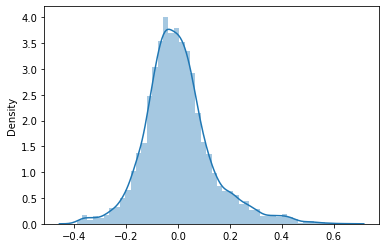

In [59]:
#calculate residuals

res = y_train - y_train_pred
sns.distplot(res)
plt.show()

Residuals have a mean of 0.0 which indicates the model is unbiased and has accurate estimates for the intercept and coefficients 

## Step 5 - Predictions and Evalauation on Test Set

In [60]:
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,is_weekday,Spring,Summer,Winter
count,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000
mean,0.200902,0.496501,0.536345,0.598511,0.229660,0.714122,0.601842,0.161085,0.004126,0.008841,0.057648,0.711187,0.240297,0.243151,0.248858
std,0.184662,0.299261,0.205508,0.209058,0.140500,0.312597,0.222838,0.245031,0.026099,0.050883,0.233144,0.453340,0.427386,0.429108,0.432475
min,0.000000,0.000000,0.029720,0.000000,0.000000,0.005575,0.046713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.052798,0.217391,0.377622,0.438776,0.121622,0.458946,0.452855,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140045,0.478261,0.548077,0.591837,0.202703,0.856564,0.621107,0.005682,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.305470,0.739130,0.704545,0.765306,0.310811,1.000000,0.787197,0.255682,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,0.950506,1.000000,0.975524,1.000000,0.756757,1.000000,0.980969,0.980114,0.485714,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
y_test = bike_test.pop('Rented Bike Count')
X_test = bike_test

In [62]:
X_test_new = X_test[['Hour','Humidity(%)','Solar Radiation (MJ/m2)','Wind speed (m/s)','Rainfall(mm)',
                     'Snowfall (cm)','Winter','Temperature(°C)']]

X_test_new.head()

,Hour,Humidity(%),Solar Radiation (MJ/m2),Wind speed (m/s),Rainfall(mm),Snowfall (cm),Winter,Temperature(°C)
3841,0.043478,0.673469,0.000000,0.135135,0.000000,0.0,0,0.554196
2060,0.869565,0.326531,0.000000,0.189189,0.000000,0.0,1,0.330420
3738,0.782609,0.316327,0.224432,0.459459,0.000000,0.0,0,0.704545
7595,0.478261,0.448980,0.613636,0.162162,0.000000,0.0,0,0.576923
7904,0.347826,0.826531,0.000000,0.108108,0.014286,0.0,0,0.522727


In [63]:
#predict 

X_test_new = sm.add_constant(X_test_new)

y_test_pred = lm9.predict(X_test_new)

In [65]:
#evaluate the model

from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_test_pred)

-0.19165407909352794

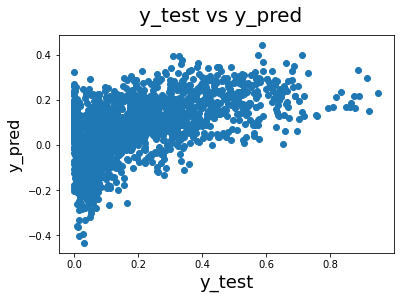

In [67]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

As was hinted from the r-squared in the training set of <0.5, there are some missing variables which help to explain the bike share demand more readily. With a negative R-squared on the test set, the model is not a good fit for predicts. It is likely that a linear model is not ideal for characterising the relationship between demand and the predictor variables. Something that was hinted at in the pairplot. 